In [1]:
# Import necessary packages
import pandas as pd 
import os
import sys
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Notebook Functions')
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Global Functions')
from helper_functions import date_to_decimal_year, rain_predictor, rain_combine, data_cleaner, data_expand
from plot_functions import eruption_counter, annual_plotter, bar_plotter, rain_averager
from el_nino_functions import elnino_strengths, nino_dict

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/GALAPAGOS_DATA'

In [3]:
# Import tables
volcanic_events = pd.read_csv(os.path.join(folder_path, "erupt_2024.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "update_2024.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

Eruption data must have columns: 'Volcano' and 'Start'. 'Start' is the beginning date of the eruption given as a string-- YYYY-MM-DD.

Rainfall data must have columns: 'Date', 'Longitude', 'Latitude', and 'Precipitation'. 'Date' is given as a string YYYY-MM-DD and the other three columns are floats.

In [4]:
sites_dict = {'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.55, -.35, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.35, -.95, 'Cerro Azul')} # Long/lat pairs must exist in rainfall data
quantiles = 4 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
log_flag = True # If true, applies a log scaling to the data
by_season = True # Make true if you want to consider rainfall quantiles yearly, or False to consider rainfall quantiles across the entire date range

# Uncomment below to use rain predictor gauge location. (For analyses of eruptions between 1964 and 2000)
# start = rainfall['Date'].min()
# compare_site = ayora
# rain_gauge = data_cleaner(compare_site)
# rainfall = data_expand(rain_gauge[rain_gauge['Date'] < start], [[sites_dict[i][0], sites_dict[i][1]] for i in sites_dict])

elninos = nino_dict(oni, rainfall)


0.20000000000004547 0.4492999999999938
0.2055000000000291 0.45479999999997744
0.1973000000000411 0.44659999999998945
0.1973000000000411 0.44659999999998945


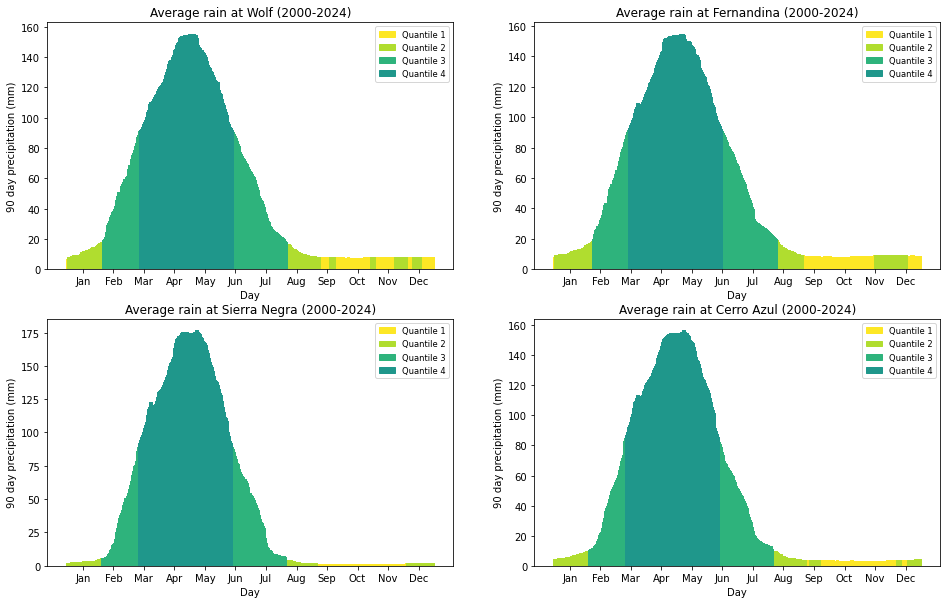

In [5]:
frame = rain_averager(rainfall, sites_dict, volcanic_events, quantiles, rolling_number)

The printed floats above are the start and end of each wet period (as a decimal)

We look at rolling averages of rainfall at each volcano site. We group dates at each volcano into quantiles based on the rolling rain averages. In gray, we've included the cumulative precipitation.

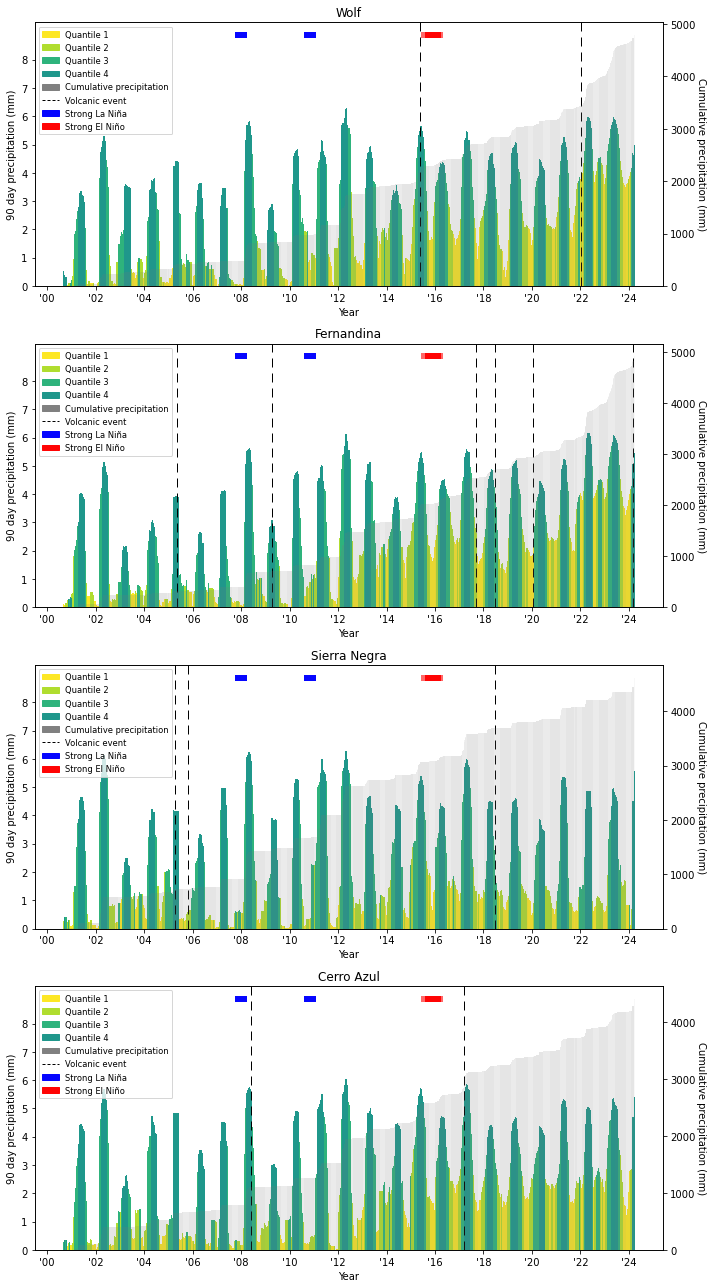

In [6]:
bar_plotter(sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos)

Below we break up eruptions into quantiles, first all together, and then by individual volcano.

2000 2025
[2015.3945 2022.0137]
2000 2025
[2005.3616 2009.2712 2017.674  2018.4548 2020.0301 2024.1671]
2000 2025
[2005.2877 2005.8055 2018.4822]
2000 2025
[2008.4082 2017.1863]


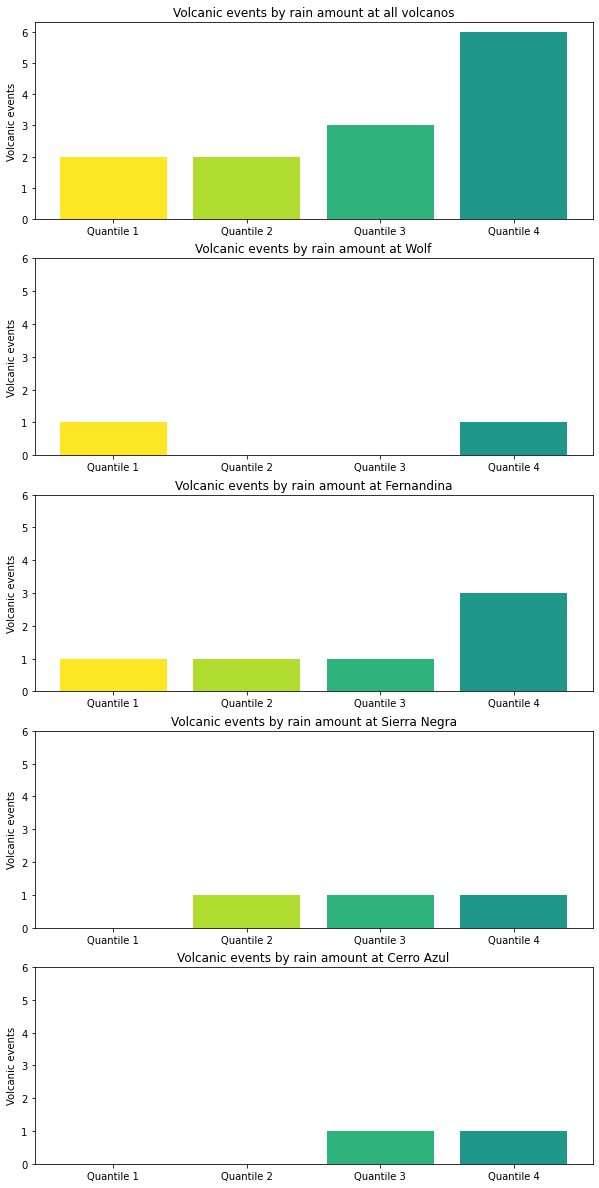

In [7]:
vals = eruption_counter(sites_dict, volcanic_events, rainfall, quantiles, rolling_number, by_season)

Below, we plot rainfall at the volcano sites by year.

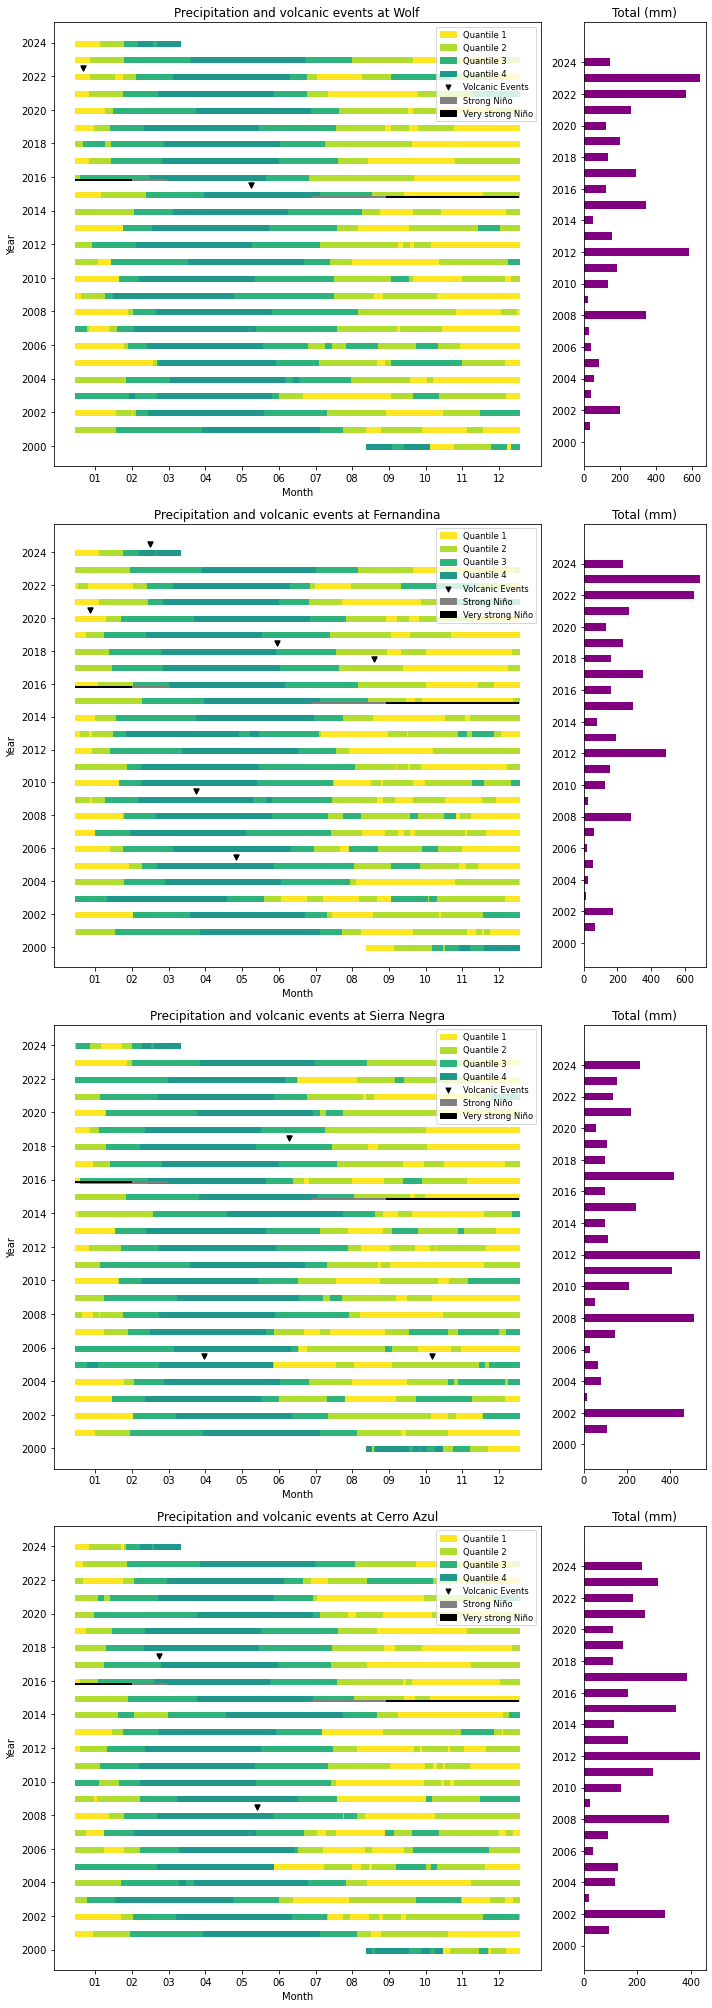

In [8]:
annual_plotter(sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos)